# Estimation of TTC-PD model
-Estimate a Lifetime TTC model over 10 years using a homogeneous time Markov chain approach and yearly migration matrix < Migration Matrix > 

-Describe your observations, in particular if and why the estimated PD vectors suitable for modelling.

In [2]:
import pandas as pd
import numpy as np
file_path = "C:\\Users\\Study\\Downloads\\CaseStudyData_2024.xlsx"
sheet_name = 'Migration Matrix'

transition_matrix = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl', header=1, index_col=0)

transition_matrix = transition_matrix[['AAA','AA','A','BBB','BB','B','CCC','D']]
transition_matrix.columns = ['AAA','AA','A','BBB','BB','B','CCC','D']
transition_matrix.head(8)

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.8726,0.0894,0.0051,0.0003,0.0010,0.0003,0.0005,0.0308
AA,0.0046,0.8763,0.0757,0.0045,0.0005,0.0006,0.0002,0.0378
A,0.0002,0.0150,0.8921,0.0472,0.0024,0.0010,0.0001,0.0419
BBB,0.0000,0.0007,0.0308,0.8713,0.0328,0.0041,0.0009,0.0594
BB,0.0001,0.0002,0.0010,0.0446,0.7859,0.0640,0.0051,0.0990
B,0.0000,0.0002,0.0006,0.0015,0.0446,0.7503,0.0485,0.1544
CCC,0.0000,0.0000,0.0008,0.0014,0.0043,0.1334,0.4495,0.4106
D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [3]:
P_10 = np.linalg.matrix_power(transition_matrix, 10)


In [6]:
pd_vector = P_10[:, -1]


In [8]:
states = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'D']
results = pd.DataFrame({'Credit Rating': states, '10-Year PD': pd_vector})
print(results)

  Credit Rating  10-Year PD
0           AAA    0.295564
1            AA    0.338747
2             A    0.378027
3           BBB    0.486635
4            BB    0.675718
5             B    0.825170
6           CCC    0.935752
7             D    1.000000


# Estimation of PiT-PD model
- Estimate a macro economic model using the < Default rate > as target variable and the < Hist. Macroeconomic Data > as explanatory variables with a regression model
- Discuss the explanatory variables in your model and the output of the test statistics you receive
  - Are the signs of the parameters economically plausible
  - Test for normality of the residuals graphically
  - Show Fitted values vs. default rate historically


### Estimate a macro economic model using the < Default rate > as target variable and the < Hist. Macroeconomic Data > as explanatory variables with a regression model

In [10]:
Corporate_Default_Rate = 'Corporate Default Rate'
target_variable = pd.read_excel(file_path, sheet_name=Corporate_Default_Rate, engine='openpyxl', header=0, index_col=0)
target_variable = target_variable[['Global Corporate Default Rate']]
target_variable.head(5)

,Global Corporate Default Rate
Year,
2000,2.48
2001,3.77
2002,3.60
2003,1.93
2004,0.78


In [16]:
Historic_Data = 'Historic Data'
explanatory_variables = pd.read_excel(file_path, sheet_name=Historic_Data, engine='openpyxl', header=0, index_col=0)
explanatory_variables.index.name = 'Year'
columns_to_drop = ['Labor Markets: Unemployment rate, (%, SA)', 'National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)',
                                 'Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)', 'Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)',
                                 'Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)',
                                 'Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)']
explanatory_variables_cleaned = explanatory_variables.drop(columns=columns_to_drop)

explanatory_variables_cleaned.head()

,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
Year,,,,
2000,NaN,0.010471,NaN,0.095546
2001,0.022191,0.007655,0.024147,0.087432
2002,0.009581,0.016043,0.022671,0.089650
2003,0.007340,0.018274,0.021216,0.093634
2004,0.020486,0.020341,0.021762,0.094083


In [88]:
merged_data = pd.merge(target_variable, explanatory_variables_cleaned, on='Year')
merged_data.head()

,Global Corporate Default Rate,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
Year,,,,,
2000,2.48,NaN,0.010471,NaN,0.095546
2001,3.77,0.022191,0.007655,0.024147,0.087432
2002,3.60,0.009581,0.016043,0.022671,0.089650
2003,1.93,0.007340,0.018274,0.021216,0.093634
2004,0.78,0.020486,0.020341,0.021762,0.094083


### Checking stationarity

In [90]:
from statsmodels.tsa.stattools import adfuller

for column in merged_data.columns:
    print(f"ADF Test for: {column}")
    result = adfuller(merged_data[column].dropna())
    adf_statistic = result[0]
    p_value = result[1]
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Stationary: Yes(p-value < 0.05)\n")
    else:
        print("Stationary: No (p-value >= 0.05)\n")

ADF Test for: Global Corporate Default Rate
ADF Statistic: -4.068231993556175
p-value: 0.0010924895318203407
Stationary: Yes(p-value < 0.05)

ADF Test for: GDP growth rate
ADF Statistic: -3.895140462909563
p-value: 0.0020709031266834717
Stationary: Yes(p-value < 0.05)

ADF Test for: Yield Structure, long-term - short-term (%)
ADF Statistic: -0.5264389829271122
p-value: 0.8867530280410195
Stationary: No (p-value >= 0.05)

ADF Test for: CPI rate
ADF Statistic: -2.719822221141259
p-value: 0.07067051989901493
Stationary: No (p-value >= 0.05)

ADF Test for: Unemployment rate
ADF Statistic: -2.1032478144499325
p-value: 0.2432106461107837
Stationary: No (p-value >= 0.05)



In [146]:
merged_data['Yield Structure Diff'] = merged_data['Yield Structure, long-term - short-term (%)'].diff()
merged_data['CPI Rate Diff'] = merged_data['CPI rate'].diff()
merged_data['Unemployment Rate Diff'] = merged_data['Unemployment rate'].diff()


In [148]:
from statsmodels.tsa.stattools import adfuller

for column in ['Yield Structure Diff', 'CPI Rate Diff', 'Unemployment Rate Diff']:
    result = adfuller(merged_data[column].dropna())
    print(column, ": ADF Statistic =", result[0], ", p-value =", result[1])


Yield Structure Diff : ADF Statistic = -3.206227029850979 , p-value = 0.019627051908161424
CPI Rate Diff : ADF Statistic = -1.6311006335524414 , p-value = 0.4669146501942326
Unemployment Rate Diff : ADF Statistic = -1.930192607096194 , p-value = 0.3179935411648094


In [98]:
merged_data['CPI Rate Second Diff'] = merged_data['CPI Rate Diff'].diff()
merged_data['Unemployment Rate Second Diff'] = merged_data['Unemployment Rate Diff'].diff()


In [100]:
from statsmodels.tsa.stattools import adfuller

for column in ['CPI Rate Second Diff', 'Unemployment Rate Second Diff']:
    result = adfuller(merged_data[column].dropna())
    print(column, ": ADF Statistic =", result[0], ", p-value =", result[1])


CPI Rate Second Diff : ADF Statistic = -4.09294916241163 , p-value = 0.0009948443344518238
Unemployment Rate Second Diff : ADF Statistic = -3.3898824743627896 , p-value = 0.011308650940405516


In [154]:
import statsmodels.api as sm

# Preparing data for regression
X = merged_data[['GDP growth rate', 'Yield Structure Diff', 
                 'CPI Rate Second Diff', 'Unemployment Rate Second Diff']].dropna()
y = merged_data['Global Corporate Default Rate'].loc[X.index]

# Adding a constant to the model
X = sm.add_constant(X)

# Fitting OLS model
model = sm.OLS(y, X).fit()

# Summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.682
Model:                                       OLS   Adj. R-squared:                  0.602
Method:                            Least Squares   F-statistic:                     8.575
Date:                           Mon, 23 Dec 2024   Prob (F-statistic):           0.000677
Time:                                   20:56:51   Log-Likelihood:                -14.496
No. Observations:                             21   AIC:                             38.99
Df Residuals:                                 16   BIC:                             44.22
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.5009      0.139     10.815      0.000       1.207       1.795
GDP growth rate                  -5.7006      5.370     -1.061      0.304     -17.085       5.684
Yield Structure Diff             25.7052     16.530      1.555      0.139      -9.336      60.747
CPI Rate Second Diff              1.4316      9.050      0.158      0.876     -17.753      20.617
Unemployment Rate Second Diff    55.9799     24.673      2.269      0.037       3.676     108.284
==============================================================================
Omnibus:                        0.506   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.592
Skew:                          -0.141   Prob(JB):                        0.744
Kurtosis:                       2.228   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# Adding squared terms for GDP growth rate and Yield Structure Diff
merged_data['GDP growth rate squared'] = merged_data['GDP growth rate'] ** 2
merged_data['Yield Structure Diff Squared'] = merged_data['Yield Structure Diff'] ** 2

# Refitting the model with the new terms
X = merged_data[['GDP growth rate squared','Yield Structure Diff Squared', 'CPI Rate Second Diff',
                 'Unemployment Rate Second Diff']].dropna()

X = sm.add_constant(X)
y = merged_data['Global Corporate Default Rate'].loc[X.index]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.729
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     10.78
Date:                           Mon, 23 Dec 2024   Prob (F-statistic):           0.000196
Time:                                   21:51:49   Log-Likelihood:                -12.797
No. Observations:                             21   AIC:                             35.59
Df Residuals:                                 16   BIC:                             40.82
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.1624      0.147      7.888      0.000       0.850       1.475
GDP growth rate squared           7.4036     77.865      0.095      0.925    -157.662     172.470
Yield Structure Diff Squared   2216.7274    699.719      3.168      0.006     733.389    3700.066
CPI Rate Second Diff             19.2771      8.371      2.303      0.035       1.531      37.023
Unemployment Rate Second Diff    73.8004     19.907      3.707      0.002      31.599     116.001
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.680
Skew:                           0.352   Prob(JB):                        0.712
Kurtosis:                       2.468   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
X = merged_data[['Yield Structure Diff Squared', 'CPI Rate Second Diff',
                 'Unemployment Rate Second Diff']].dropna()

X = sm.add_constant(X)
y = merged_data['Global Corporate Default Rate'].loc[X.index]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.729
Model:                                       OLS   Adj. R-squared:                  0.682
Method:                            Least Squares   F-statistic:                     15.27
Date:                           Mon, 23 Dec 2024   Prob (F-statistic):           4.48e-05
Time:                                   21:51:57   Log-Likelihood:                -12.803
No. Observations:                             21   AIC:                             33.61
Df Residuals:                                 17   BIC:                             37.78
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.1694      0.124      9.439      0.000       0.908       1.431
Yield Structure Diff Squared   2229.5021    666.385      3.346      0.004     823.553    3635.451
CPI Rate Second Diff             19.1577      8.032      2.385      0.029       2.213      36.103
Unemployment Rate Second Diff    73.9794     19.232      3.847      0.001      33.404     114.554
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.676
Skew:                           0.366   Prob(JB):                        0.713
Kurtosis:                       2.513   Cond. No.                     6.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = merged_data[['Yield Structure Diff Squared', 'CPI Rate Second Diff', 'Unemployment Rate Second Diff']].dropna()
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                        Variable       VIF
0                          const  1.316523
1   Yield Structure Diff Squared  1.757920
2           CPI Rate Second Diff  2.675620
3  Unemployment Rate Second Diff  2.480488


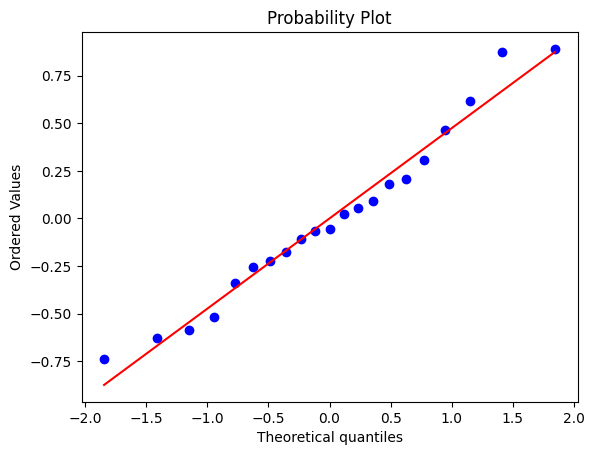

In [297]:
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [299]:
from scipy.stats import shapiro
print("Shapiro-Wilk Test p-value:", shapiro(residuals)[1])


Shapiro-Wilk Test p-value: 0.6388465013445903


In [301]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan Test p-value:", pval)


Breusch-Pagan Test p-value: 0.18842143681630671


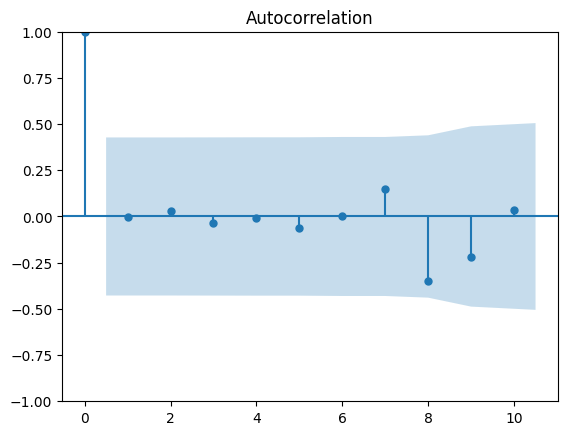

In [303]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.show()


In [305]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", np.sqrt(-scores.mean()))


Cross-Validation RMSE: 0.6012767990778783


In [307]:
std_dev = y.std()
print("Standard Deviation of Dependent Variable:", std_dev)


Standard Deviation of Dependent Variable: 0.8767475066837603


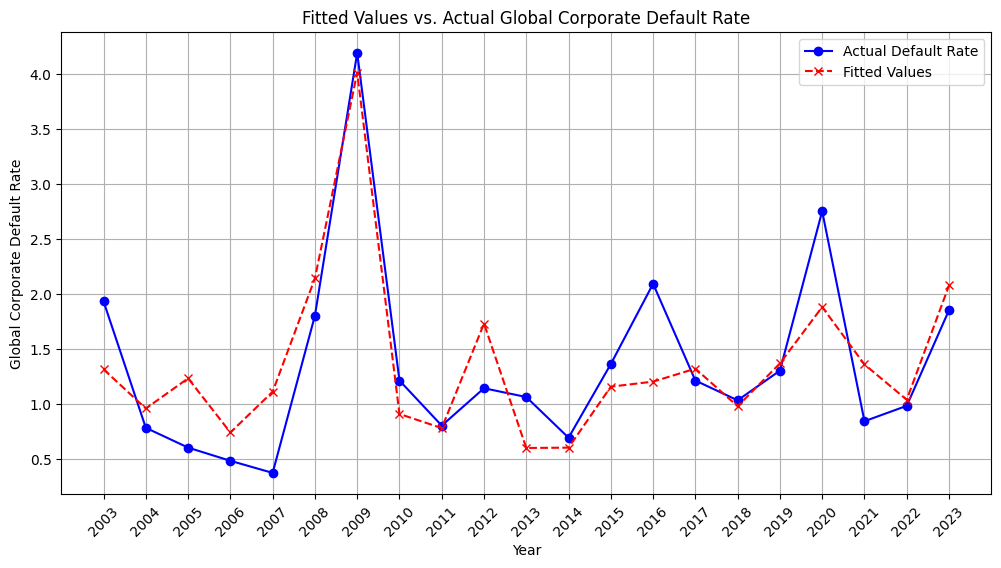

In [278]:
import matplotlib.pyplot as plt

fitted_values = model.fittedvalues

years = actual_values.index.astype(int)

# Plotting actual vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(years, actual_values, label="Actual Default Rate", color="blue", marker='o')
plt.plot(years, fitted_values, label="Fitted Values", color="red", linestyle='--', marker='x')
plt.title("Fitted Values vs. Actual Global Corporate Default Rate")
plt.xlabel("Year")
plt.ylabel("Global Corporate Default Rate")
plt.xticks(years, rotation=45)  # Rotate the x-axis labels if needed
plt.legend()
plt.grid()
plt.show()


# Apply your modeled shift factor on the TTC Lifetime PDs to get PiT Lifetime PDs (show the difference graphically for each grade) with the given predictions in < Fore. Macroeconomic Data >. Describe your observations.

In [554]:
forecast_data = pd.read_excel(file_path, sheet_name="Forecast Data (Baseline)", engine="openpyxl")
forecast_data.head()

,Description:,"Labor Markets: Unemployment rate, (%, SA)","Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)","National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)","Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)","Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)",GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
0,2024,6.9,124.196536,15632.634300,2.91,2.62,0.005,-0.0029,0.063,0.069
1,2025,6.8,128.419218,15929.654352,2.71,2.66,0.019,-0.0005,0.034,0.068
2,2026,6.6,131.372860,16216.388130,2.47,2.74,0.018,0.0027,0.023,0.066


In [572]:
# Selecting features matching the model
forecast_features = forecast_data[["Yield Structure, long-term - short-term (%)", 
                                   "CPI rate", 
                                   "Unemployment rate"]]
# Adding a constant to forecast_features to match the model
forecast_features = sm.add_constant(forecast_features, has_constant="add")

# Using the regression model to predict default rates (DR_t+h)
predicted_dr = model.predict(forecast_features)
forecast_data["Predicted_DR"] = predicted_dr
# Computing the average default rate (Central Tendency)
average_dr = predicted_dr.mean()

In [574]:
# Calculating the Shift Factor
forecast_data["ShiftFactor"] = forecast_data["Predicted_DR"] / average_dr


In [576]:
# Using the previously calculated 10-Year TTC PDs for each grade
ttc_pds = pd.Series(
    [0.295564, 0.338747, 0.378027, 0.486635, 0.675718, 0.825170, 0.935752, 1.000000],
    index=["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D"]
)

# Calculate PiT Lifetime PDs for each grade
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)


pit_pds.index = [2024, 2025, 2026]
pit_pds.index.name = "Years"

In [578]:
ttc_pds

AAA    0.295564
AA     0.338747
A      0.378027
BBB    0.486635
BB     0.675718
B      0.825170
CCC    0.935752
D      1.000000
dtype: float64

In [580]:
pit_pds

,AAA,AA,A,BBB,BB,B,CCC,D
Years,,,,,,,,
2024,0.046735,0.053563,0.059774,0.076947,0.106845,0.130477,0.147962,0.158121
2025,0.264043,0.302621,0.337712,0.434737,0.603655,0.737169,0.835958,0.893354
2026,0.575914,0.660057,0.736595,0.948220,1.000000,1.000000,1.000000,1.000000


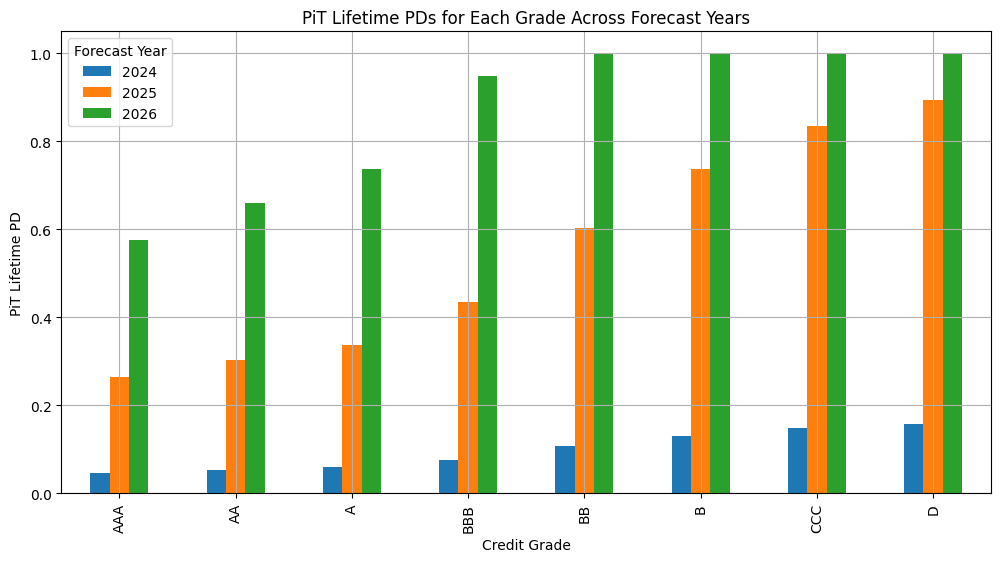

In [584]:
import matplotlib.pyplot as plt

# Transposing the DataFrame for easier plotting
pit_pds_transposed = pit_pds.T

# Plotting the PiT Lifetime PDs for each forecast year
pit_pds_transposed.plot(kind='bar', figsize=(12, 6))
plt.title("PiT Lifetime PDs for Each Grade Across Forecast Years")
plt.xlabel("Credit Grade")
plt.ylabel("PiT Lifetime PD")
plt.legend(title="Forecast Year", loc='upper left')
plt.grid()
plt.show()


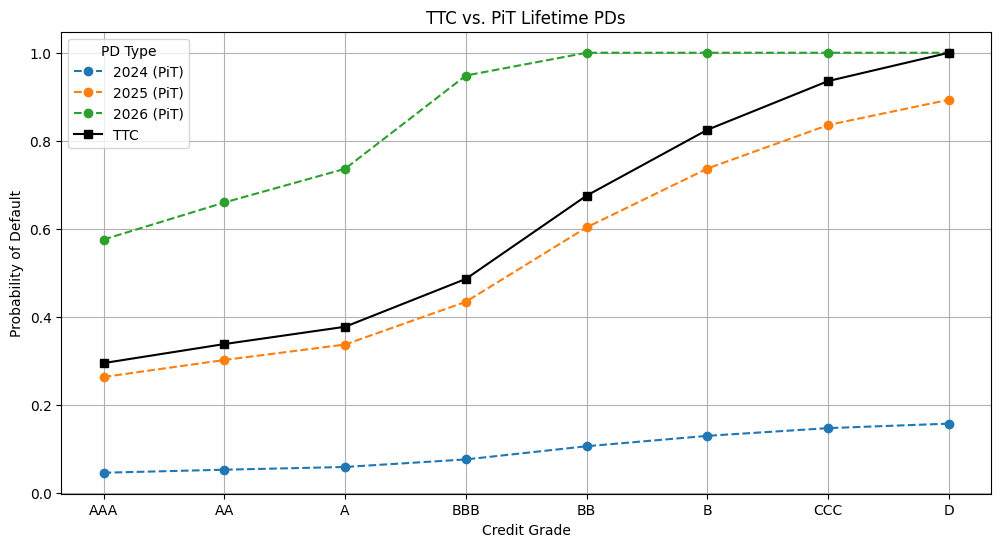

In [568]:
import matplotlib.pyplot as plt

# Plotting PiT and TTC Lifetime PDs for each grade
plt.figure(figsize=(12, 6))

grades = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D"]

# Plotting PiT Lifetime PDs for each forecast year
for year in pit_pds.index:
    plt.plot(grades, pit_pds.loc[year], label=f"{year} (PiT)", linestyle='--', marker='o')

# Plotting TTC Lifetime PDs
plt.plot(grades, ttc_pds.values, label="TTC", linestyle='-', marker='s', color='black')

# Customizing the plot
plt.title("TTC vs. PiT Lifetime PDs")
plt.xlabel("Credit Grade")
plt.ylabel("Probability of Default")
plt.legend(title="PD Type")
plt.grid(True)
plt.show()
